In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from display import STMimagePlot
from os.path import join

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=1
[512, 512]
SUCCESS---------SELECT Z_forward from STMimageValue WHERE List_ID=1
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=1
[512, 512]
SUCCESS---------SELECT Z_backward from STMimageValue WHERE List_ID=1


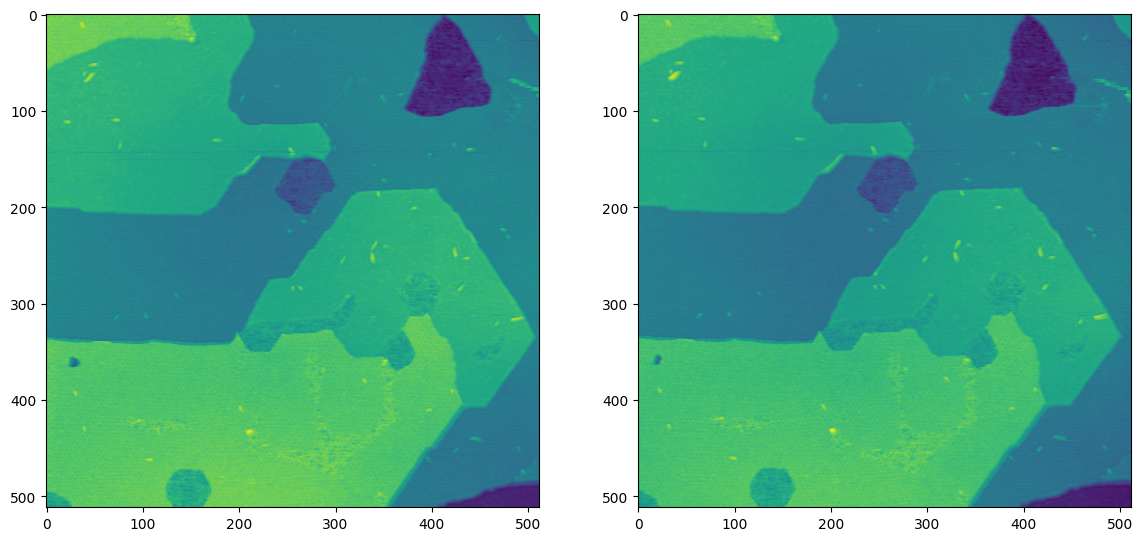

In [5]:
myDir="../../../STMdata"
myFolder="20221116"
myfileNane="SiC028.sxm"
filePath=join(myDir,myFolder,myfileNane)

Myimage=STMimagePlot(filePath=filePath,dataseName="../../STMdata.db")
Myimage.plot(channel=None)